# Predictive Maintenance Project

## Model Training and Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2

from app.preprocessing import standardize, load_data
from app.logging_config import setup_logging, log_message, log_error

In [2]:
setup_logging('../logs/model_building.log')

In [3]:
try: 
    df = load_data('../data/training/train_fd.csv')
    log_message('Loaded dataset successfully')
except Exception as e:
    log_error("Failed to load dataset: "+ str(e))

In [4]:
try:
    df, scaler_params = standardize(df, scaler_params=None, save_path="models/scaler.pkl")
    log_message('Data standardized successfully')
except Exception as e:
    log_error("Failed to standardize dataset: "+ str(e))

In [63]:
try:
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    log_message('Data split successful')
except Exception as e:
    log_error(f"Failed to split data: {e}")

In [64]:
try:

    model=Sequential([
        Input(shape=(25,)),
        Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(50, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(25, activation='relu', kernel_regularizer=l2(0.01)),
        Dense(1, activation='linear', kernel_regularizer=l2(0.01))
    ])

    model.compile(optimizer='adam', loss='mse')

    log_message("Model compiled successfully")
except Exception as e:
    log_error("Failed to compile model: "+ str(e))

In [65]:
import numpy as np

# Check for NaNs in training data
print(np.isnan(X_train).sum(), "NaNs in X_train")
print(np.isnan(y_train).sum(), "NaNs in y_train")
print(np.isnan(X_val).sum(), "NaNs in X_val")
print(np.isnan(y_val).sum(), "NaNs in y_val")

0 NaNs in X_train
0 NaNs in y_train
0 NaNs in X_val
0 NaNs in y_val


In [66]:
try:
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=60, batch_size=32)
    log_message("Model fitted successfully")
except Exception as e:
    log_error(e)

Epoch 1/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 5239.0688 - val_loss: 2445.9524
Epoch 2/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2473.2961 - val_loss: 2388.6204
Epoch 3/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2436.5149 - val_loss: 2323.8352
Epoch 4/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 2385.6130 - val_loss: 2327.1077
Epoch 5/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2391.1851 - val_loss: 2294.7820
Epoch 6/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 2363.0051 - val_loss: 2320.3323
Epoch 7/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2340.4001 - val_loss: 2312.5645
Epoch 8/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2331.7866 - val_loss: 2398.3000
Epoch 9/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 2310.7334 - val_loss: 2251.9248
Epoch 10/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 2311.3271 - val_loss: 2294.1414
Epoch 11/60
4009/4009 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/ste

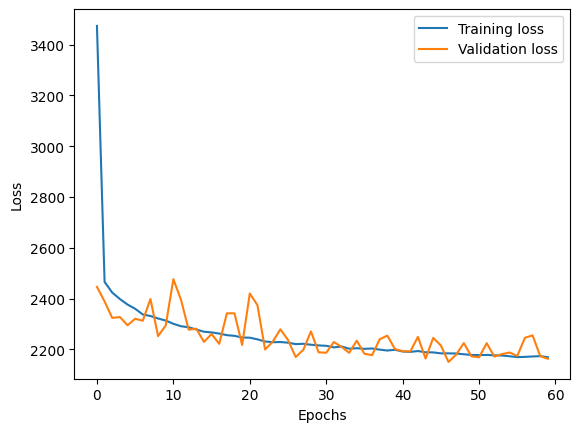

In [67]:
try:
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
except Exception as e:
    log_error("Failed to plot training history: "+ str(e))

In [68]:
try:
    test_df = load_data('../data/testing/test_fd.csv')
    test_df, scaler_params = standardize(test_df, scaler_params)
    X_test = df.iloc[:, :-1].values
    y_test = df.iloc[:, -1].values

    log_message("Test data processed successfully")
except Exception as e:
    log_error("Failed to process test data: "+ str(e))

c:\Users\VARDAN S KAMRA\Desktop\Predictive Maintainance Project\Predictive_Maintainance_Project\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [69]:
try:
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")

    log_message(f"Model Performance: \n MAE: {mae} \n MSE: {mse} \n R2 SCORE: {r2}")
except Exception as e:
    log_error("Failed to evaluate model performance: "+ str(e))

5012/5012 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
MAE: 32.340507093454804
MSE: 2135.105718950797
R2 Score: 0.6940486431121826


On average, the model's predictions are off by 32 units. Mean Absolute Error (MAE) is a measure of the absolute differences between predicted and actual values. Lower MAE indicates better model performance.

Mean Squared Error measures the average of the squares of the errors, giving more weight to larger errors. Lower MSE indicates better model performance. In this context, the MSE value is quite large, suggesting there are some errors in the predictions.

The R² score ranges from 0 to 1 and indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² score of 0.694 means that approximately 69.4% of the variance in the target variable (Remaining Useful Life) is explained by the model. Generally, an R² score closer to 1 indicates a better fit, while a score closer to 0 indicates a poor fit.

Our model shows a reasonable fit with an R² score of 0.69, but the MAE and MSE suggest there is room for improvement. However, the baseline performance is not high either as there are not a lot of human methods to predict when an engine will fail with high accuracy.

In [126]:
t=pd.DataFrame(np.array([[50,-0.0032,-0.0001,100.0,518.67,642.77,1588.49,1403.62,14.62,21.61,553.92,2388.06,9048.6,1.3,47.47,522.33,2388.09,8127.3,8.4116,0.03,392,2388,100.0,38.85,23.4106,142]]), columns=None)
t, scaler_params = standardize(t, scaler_params)
t_act = t.iloc[:,25]
t=t.iloc[:,:25]
t_pred=model.predict(t)
print("Predicted Value: ", t_pred[0][0])
print("Actual Value: ", t_act[0])
mae = mean_absolute_error(t_act, t_pred)
print(mae)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted Value:  148.29298
Actual Value:  142.0
6.2929840087890625


As you can see, selecting a random cycle of a random engine, we are able to predict the remaining useful life of that engine with reasonable accuracy. For this engine on its 50th engine cycle, we predicted it has 148 useful cycles remaining (actually has 142). It's far from perfect; but given that there is not a very reliable method for humans to do it themselves, its actually quite helpful.

In [127]:
model.save("models/rul_model.keras")